In [4]:
import pandas as pd
#Loading dataset 

df = pd.read_csv("home_prices.csv")
df.head()

,area_sqr_ft,price_lakhs
0,656,39.0
1,1260,83.2
2,1057,86.6
3,1259,59.0
4,1800,140.0


In [5]:
 #importing some other functions 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
# 2. Features (X) and Target (y)
X = df[['area_sqr_ft']]   # must be 2D
y = df['price_lakhs']     # 1D

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
# 4. Create & fit model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
# 5. Predictions
y_pred = model.predict(X_test)

In [10]:
# 6. Model evaluation
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficient (slope): 0.0628525876657604
Intercept: 5.435241080841166
R² score: 0.16828217847384275
RMSE: 21.713857135802716


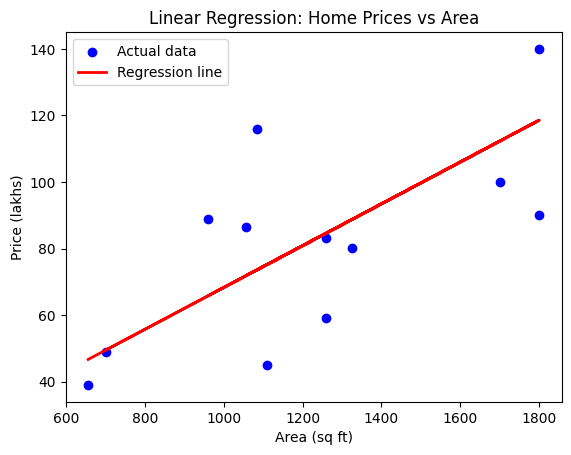

In [11]:
# 7. Visualization
plt.scatter(X, y, color="blue", label="Actual data")
plt.plot(X, model.predict(X), color="red", linewidth=2, label="Regression line")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (lakhs)")
plt.title("Linear Regression: Home Prices vs Area")
plt.legend()
plt.show()

In [12]:
# ---- Test new examples ----

# Example: predict price for homes with given sq ft
test_area = [[1000], [1500], [2000]]   # must be 2D
predicted_price = model.predict(test_area)

for area, price in zip(test_area, predicted_price):
    print(f"Predicted price for {area[0]} sq ft = {price:.2f} lakhs")

Predicted price for 1000 sq ft = 68.29 lakhs
Predicted price for 1500 sq ft = 99.71 lakhs
Predicted price for 2000 sq ft = 131.14 lakhs


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# ---- Interactive Prediction ----

while True:
    try:
        # Take user input
        area = float(input("Enter house area in sq ft (or type -1 to exit): "))
        
        if area == -1:
            print("Exiting prediction tool.")
            break
        
        # Must pass as 2D [[value]]
        predicted_price = model.predict([[area]])[0]
        print(f"Predicted Price for {area:.0f} sq ft = {predicted_price:.2f} lakhs\n")
    
    except ValueError:
        print("Invalid input. Please enter a numeric value.")

Enter house area in sq ft (or type -1 to exit):  200


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Price for 200 sq ft = 18.01 lakhs



Enter house area in sq ft (or type -1 to exit):  40000


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Price for 40000 sq ft = 2519.54 lakhs

